# Breast Cancer Prediction: Malignant Vs Benign

In [64]:
#Predict whether a women's breast cancer is malignant or benign
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, \
confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile

### Data Extraction and Preliminary Analysis

In [2]:
!kaggle datasets download -d uciml/breast-cancer-wisconsin-data

Dataset URL: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
License(s): CC-BY-NC-SA-4.0
  0%|                                               | 0.00/48.6k [00:00<?, ?B/s]
100%|███████████████████████████████████████| 48.6k/48.6k [00:00<00:00, 179MB/s]


In [3]:
with zipfile.ZipFile("breast-cancer-wisconsin-data.zip", 'r') as zip_ref:
    zip_ref.extractall("breast-cancer")

In [4]:
raw_df = pd.read_csv("breast-cancer/data.csv")
pd.set_option('display.max_columns', None)
raw_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
raw_df.shape

(569, 33)

In [6]:
raw_df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [10]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [12]:
print(raw_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [16]:
raw_df.drop(columns = ['id', 'Unnamed: 32'], inplace = True)

In [19]:
raw_df.select_dtypes(include = 'object').columns

Index(['diagnosis'], dtype='object')

In [21]:
raw_df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [22]:
raw_df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [26]:
#1 if malignant, 0 if benign
raw_df['diagnosis'] = raw_df['diagnosis'].map({'M': 1, 'B': 0})
raw_df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Data Visualizations

/var/folders/1p/bkw8vf0537qgpg1zgyfwq80r0000gn/T/ipykernel_33135/422028409.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: title={'center': 'Malignant(1) Vs Benign(0) Diagnosis'}, xlabel='diagnosis', ylabel='count'>

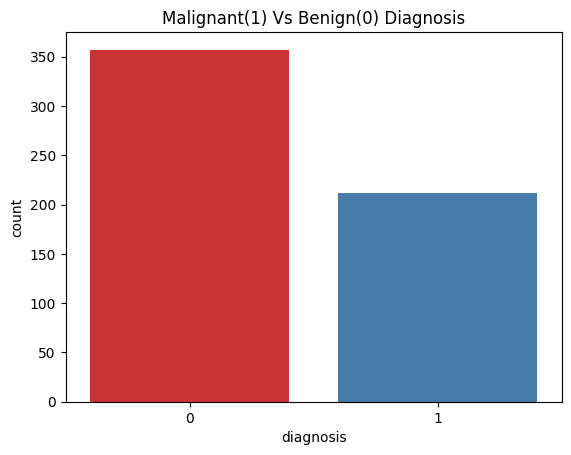

In [39]:
plt.title('Malignant(1) Vs Benign(0) Diagnosis')
sns.countplot(data = raw_df, x = 'diagnosis', palette = 'Set1')

In [ ]:
raw_df_2 = raw_df.drop(columns = ['diagnosis'])

<Axes: title={'center': 'Feature Correlation with Malignant Diagnosis'}>

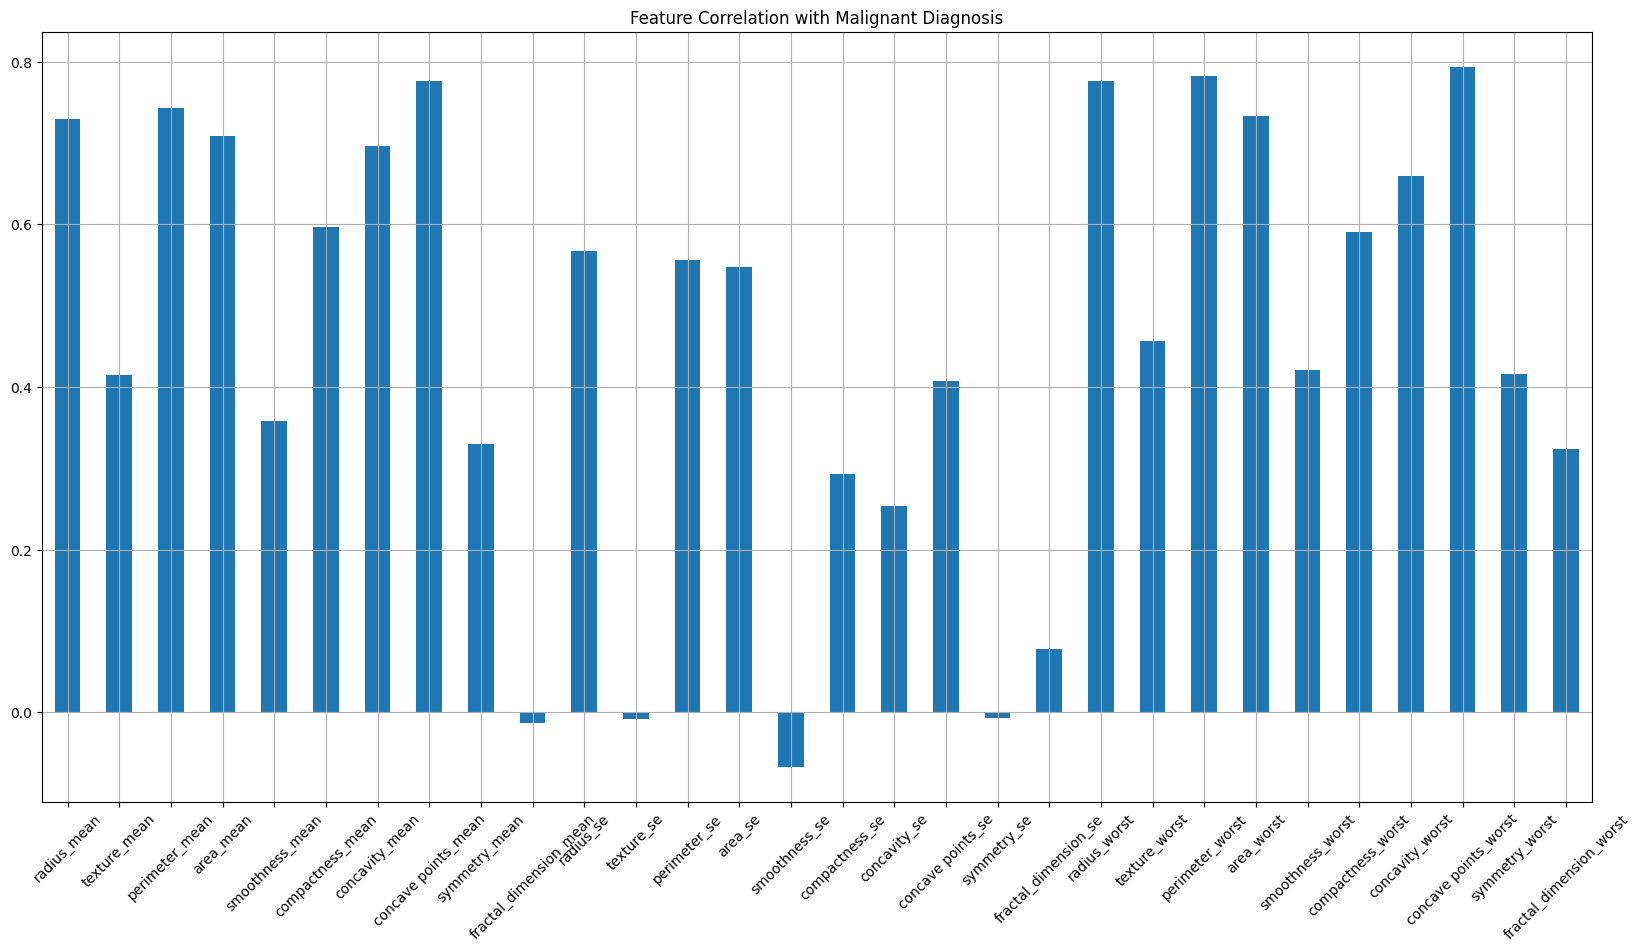

In [41]:
raw_df_2.corrwith(raw_df['diagnosis']).plot.bar(
    figsize = (20, 10), title = 'Feature Correlation with Malignant Diagnosis',
    rot = 45, grid = True
)

In [42]:
corr = raw_df.corr()

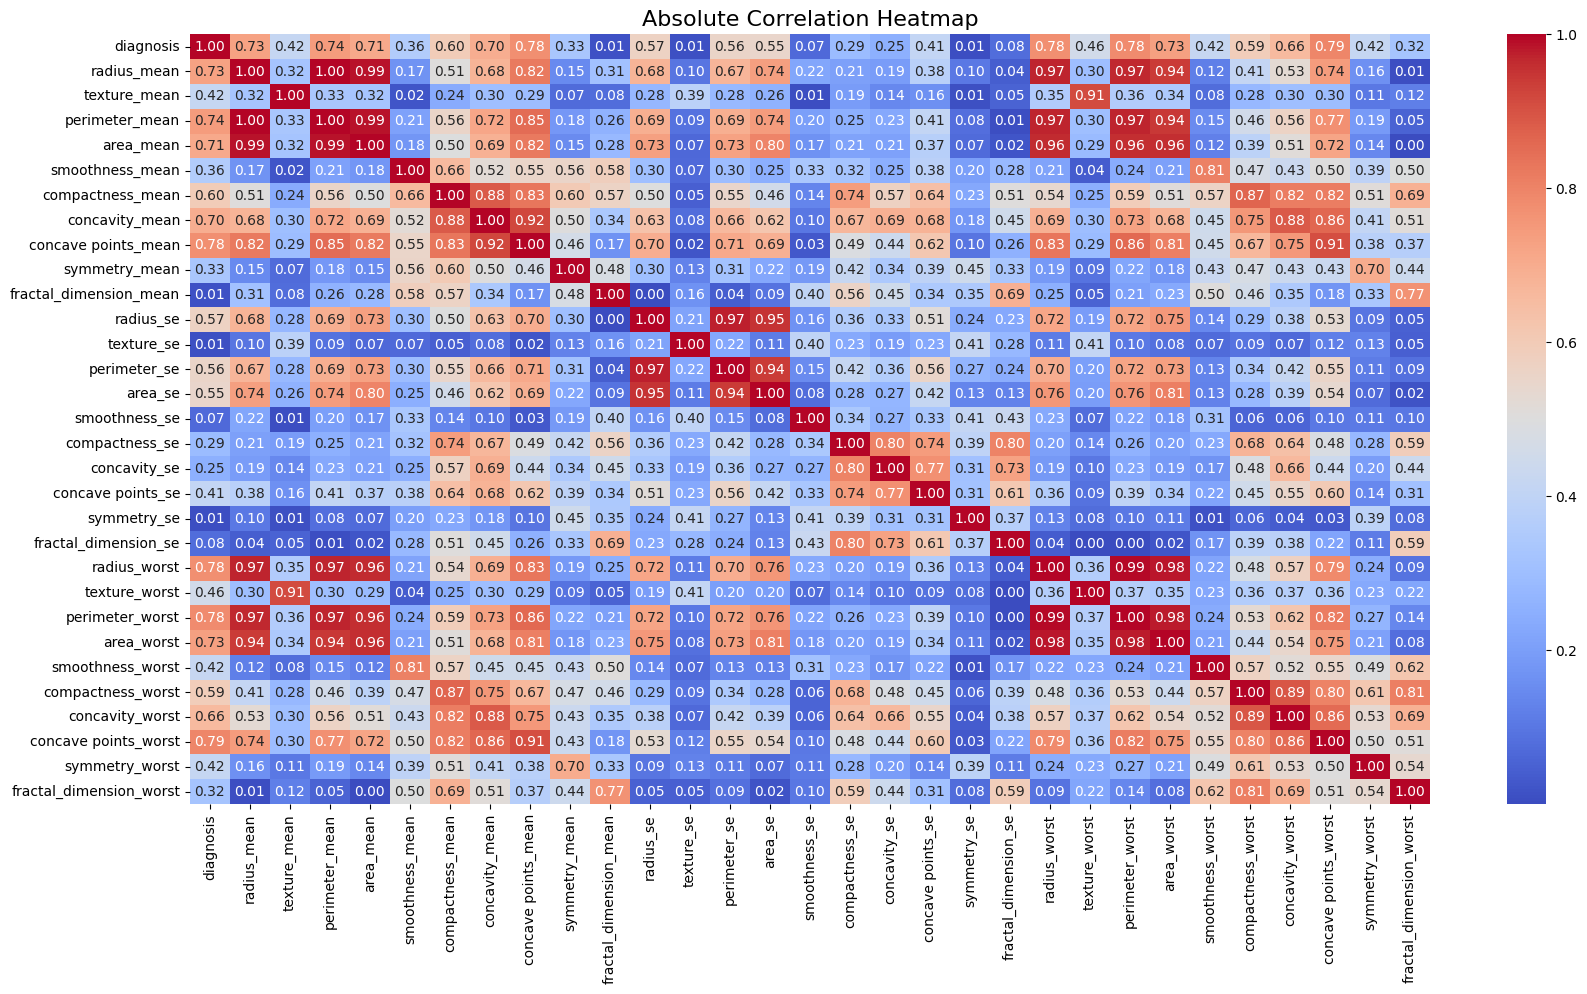

In [45]:
plt.figure(figsize = (20,10))
sns.heatmap(corr.abs(), annot = True, fmt = '.2f', cmap = 'coolwarm')
plt.title("Absolute Correlation Heatmap", fontsize=16)
plt.show()

In [49]:
px.scatter(
    raw_df, 
    y = 'perimeter_worst', 
    x = 'perimeter_mean',
    color = raw_df['diagnosis'].astype(str),
    color_discrete_map = {'0': 'blue', '1': 'red'})

In [50]:
px.scatter(
    raw_df, 
    y = 'area_mean', 
    x = 'radius_worst',
    color = raw_df['diagnosis'].astype(str),
    color_discrete_map = {'0': 'blue', '1': 'red'})

In [51]:
px.scatter(
    raw_df, 
    y = 'radius_se', 
    x = 'perimeter_se',
    color = raw_df['diagnosis'].astype(str),
    color_discrete_map = {'0': 'blue', '1': 'red'})

In [52]:
px.scatter(
    raw_df, 
    y = 'radius_se', 
    x = 'area_se',
    color = raw_df['diagnosis'].astype(str),
    color_discrete_map = {'0': 'blue', '1': 'red'})

### Apply Machine Learning Techniques
-> Data Splitting<br>
-> Scalling<br>
-> Logistic Regression<br>

In [53]:
y_target = raw_df['diagnosis']
numeric_columns = raw_df.select_dtypes(include = 'float64').columns
X_inputs = raw_df[numeric_columns]

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X_inputs, y_target, test_size = 0.2, random_state = 7)

In [60]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [61]:
#Create ML pipeline
preproccessor = ColumnTransformer(
    transformers = [
        ('numerical', MinMaxScaler(feature_range = (0, 1)), numeric_columns)
    ]
)

In [62]:
model = Pipeline(
    steps = [
        ('preprocess', preproccessor),
        ('classifier', LogisticRegression(max_iter = 1000))
    ]
)

In [63]:
model.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning:

divide by zero encountered in matmul

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning:

overflow encountered in matmul

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:200: RuntimeWarning:

invalid value encountered in matmul

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning:

divide by zero encountered in matmul

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:330: RuntimeWarning:

overflow encountered in matmul

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/linear_model/_linear_loss.py:330: Runtim

,steps,"[('preprocess', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('numerical', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [65]:
#Predict on the training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning:

divide by zero encountered in matmul

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning:

overflow encountered in matmul

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning:

invalid value encountered in matmul

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning:

divide by zero encountered in matmul

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning:

overflow encountered in matmul

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning:

invalid value encountered in matmul



In [66]:
#Accuracy metrics on the training data
accuracy = accuracy_score(y_train, y_train_pred)
f1 = f1_score(y_train, y_train_pred)
precision = precision_score(y_train, y_train_pred)
recall = recall_score(y_train, y_train_pred)

In [67]:
result_training = pd.DataFrame([[accuracy, f1, precision, recall]], columns = ['Accuracy','F1 Score', 'Precision Score','Recall Score'])

In [70]:
result_training

,Accuracy,F1 Score,Precision Score,Recall Score
0,0.964835,0.951515,0.993671,0.912791


In [83]:
cm_training = confusion_matrix(y_train, y_train_pred, normalize = 'true')
model.classes_

array([0, 1])

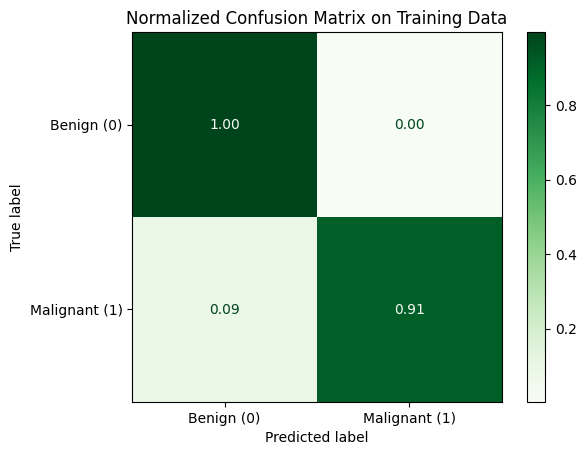

In [84]:
labels = ['Benign (0)', 'Malignant (1)']
disp = ConfusionMatrixDisplay(confusion_matrix = cm_training, display_labels = labels)
disp.plot(cmap = 'Greens', values_format = ".2f")
plt.title("Normalized Confusion Matrix on Training Data")
plt.show()

In [85]:
#Accuracy metrics on the testing data
accuracy_ = accuracy_score(y_test, y_test_pred)
f1_ = f1_score(y_test, y_test_pred)
precision_ = precision_score(y_test, y_test_pred)
recall_ = recall_score(y_test, y_test_pred)

In [86]:
result_testing = pd.DataFrame([[accuracy_, f1_, precision_, recall_]], columns = ['Accuracy','F1 Score', 'Precision Score','Recall Score'])

In [87]:
result_testing

,Accuracy,F1 Score,Precision Score,Recall Score
0,0.964912,0.947368,1.0,0.9


In [89]:
cm_training_ = confusion_matrix(y_test, y_test_pred, normalize = 'true')

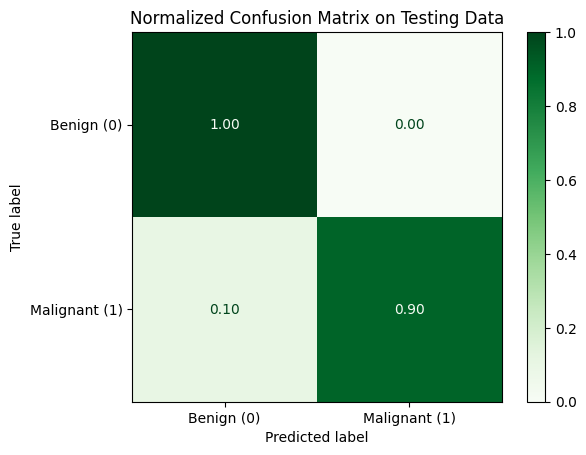

In [90]:
labels = ['Benign (0)', 'Malignant (1)']
disp = ConfusionMatrixDisplay(confusion_matrix = cm_training_, display_labels = labels)
disp.plot(cmap = 'Greens', values_format = ".2f")
plt.title("Normalized Confusion Matrix on Testing Data")
plt.show()